In [1]:
import numpy as np
import networkx as nx
from pylab import *

In [2]:
def Initial_Set():
    
    global g
    # Creating a new empty Graph object
    g=nx.Graph()
    
    #adding a brunch of nodes at once
    g.add_nodes_from(['Adan','Eva','Cain','Maria','Set','Magdalen'])
    
    #adding properties to the nodes
    
    g.node['Adan']['sex']='Male'
    g.node['Eva']['sex']='Female'
    g.node['Cain']['sex']='Male'
    g.node['Maria']['sex']='Female'
    g.node['Set']['sex']='Male'
    g.node['Magdalen']['sex']='Female'

    g.node['Adan']['age']=30
    g.node['Eva']['age']=30
    g.node['Cain']['age']=15
    g.node['Maria']['age']=15
    g.node['Set']['age']=10
    g.node['Magdalen']['age']=10

    
    #adding edges
    
    g.add_edge('Adan', 'Eva', weight=1.5)
    g.add_edge('Adan', 'Cain', weight=1.0)
    g.add_edge('Adan', 'Maria', weight=1.0)
    g.add_edge('Eva', 'Cain', weight=1.0)
    g.add_edge('Eva', 'Maria', weight=1.0)
    g.add_edge('Cain', 'Maria', weight=0.5)
    



In [3]:
def Union_set():
    global g,h,G
    h = g.copy()

    G = nx.disjoint_union(g,h)

    G.add_edge(3,6,weight=1.5)
    update_age()
    

In [4]:
def update_age():
    global G
    for i in G.node:
        G.node[i]['age'] +=1


In [5]:
def Plot_network(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1.0]
    emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1.0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 1.0]
    node_c = ['b' if G.node[i]['sex']=='Male' else 'r' for i in G.node]
    node_s = [G.node[i]['age'] for i in G.node]

    pos = nx.spring_layout(G)


# nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_s, node_color = node_c)


# edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,width=4)
    nx.draw_networkx_edges(G, pos, edgelist=emedium,
                       width=3, alpha=0.5, edge_color='b', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.3, edge_color='g', style='dashed')

# labels
    #nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    axis('off')
    title('First Spaiens families')
    figure(figsize=(20, 20));
    show()


In [6]:
def new_birth(new_node,first,vecino):
    """function to make a new baby. Need to intoduce the siblings edges"""
    
    G.add_node(new_node)
    G.node[new_node]['sex']=choice(['Male','Female'])
    G.node[new_node]['age']=10
    G.add_edge(new_node, first, weight=1.0)
    G.add_edge(new_node, vecino, weight=1.0)
    
    # Buscamos hermanos 
    
    siblings =list(set(G.neighbors(first)) & set(G.neighbors(vecino)))
    if siblings:
        for i in siblings:
            G.add_edge(new_node,i, weight=0.5)

    

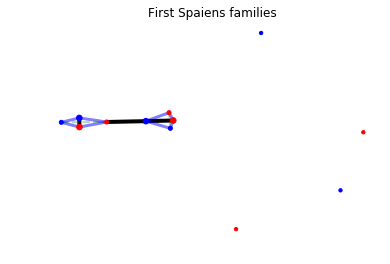

<Figure size 1440x1440 with 0 Axes>

In [22]:
Initial_Set()
Union_set()
Plot_network(G)

In [23]:
print(g.number_of_nodes())
print(G.number_of_nodes())

print(g.number_of_edges())
print(G.number_of_edges())

print(nx.density(G))

6
12
6
13
0.19696969696969696


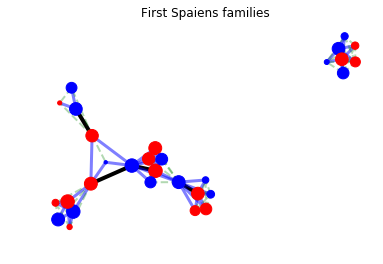

<Figure size 1440x1440 with 0 Axes>

In [24]:
while G.number_of_nodes()<30:
    

    # Elijo un nodo al azar de la red

    first = np.random.randint(G.number_of_nodes())

    #print(first) 
    #print(G.edges(first))

    # Elijo un nodo vecino

    nodes_vecinos = list(G.neighbors(first))
    nodes_out = list(set(G.nodes()) - set(nodes_vecinos))
    
    #nodes_out = list(G.nodes)
    #print(nodes_vecinos)

    # Si tiene vecinos, elijo un vecino. Si el vecino elegido es su pareja, tienen un nuevo nodo

    if nodes_vecinos:
        vecino = choice(nodes_vecinos)
        #print(vecino)
        if G.edges[first,vecino]['weight']>1.0:
            #print('New_birth')
            new_node = G.number_of_nodes()
            #print(new_node)
            new_birth(new_node,first,vecino)
            #Plot_network(G)

        else:
            pass
            #otro = choice(nodes_out)
            #if G.node[first]['sex'] != G.node[otro]['sex']:
            #    G.add_edge(otro, first, weight=1.5)


    else:
        second = np.random.randint(G.number_of_nodes())

        if G.node[first]['sex'] != G.node[second]['sex']:
            # Polygamy is permited 
            G.add_edge(second, first, weight=1.5)
            
    update_age()    
    
Plot_network(G)




In [25]:
G.number_of_nodes()

30